- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [2]:
import sys
sys.path.insert(0,'../pestools')

In [3]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final


In [4]:
import pestools

In [8]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [10]:
import warnings
warnings.filterwarnings('ignore')

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [12]:
directory_name = 'Case5_III_C_glm_start.demo'
cf_name = 'Case5_III_C_glm_cf_v1' # Control file name

#### Accessing the objective function with every iteration 

In [21]:
#res_start = pd.read_csv('Case5_III_C_glm_start.demo/Case5_III_C_glm_cf_v1.res',delim_whitespace=True)
#res_start.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weight*Measured,Weight*Modelled,Weight*Residual,Measurement_sd,Natural_weight
0,stemp_0.04_0,temp,261.0233,270.1500,-9.126736,0.000196,0.051081,0.052867,-0.001786,10.37566,0.096379
1,stemp_0.04_1,temp,261.0067,269.2823,-8.275591,0.000196,0.051078,0.052697,-0.001619,10.37566,0.096379
2,stemp_0.04_2,temp,260.8549,268.4493,-7.594460,0.000196,0.051048,0.052534,-0.001486,10.37566,0.096379
3,stemp_0.04_3,temp,261.0327,267.6326,-6.599863,0.000196,0.051083,0.052374,-0.001292,10.37566,0.096379
4,stemp_0.04_4,temp,261.3470,266.7391,-5.392099,0.000196,0.051144,0.052199,-0.001055,10.37566,0.096379


In [22]:
res_start = pd.read_csv('Case5_III_C_glm_start.demo/Case5_III_C_glm_cf_v1.rei',delim_whitespace=True, skiprows=2)
res_start.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,261.0233,270.1500,-9.126736,0.000196
1,stemp_0.04_1,temp,261.0067,269.2823,-8.275591,0.000196
2,stemp_0.04_2,temp,260.8549,268.4493,-7.594460,0.000196
3,stemp_0.04_3,temp,261.0327,267.6326,-6.599863,0.000196
4,stemp_0.04_4,temp,261.3470,266.7391,-5.392099,0.000196


In [24]:
temp_measured = res_start.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_start.iloc[2555:,2]

temp_sim = res_start.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_start.iloc[2555:,3]

temp_res = res_start.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_start.iloc[2555:,4]

Text(0.5, 0, 'Days')

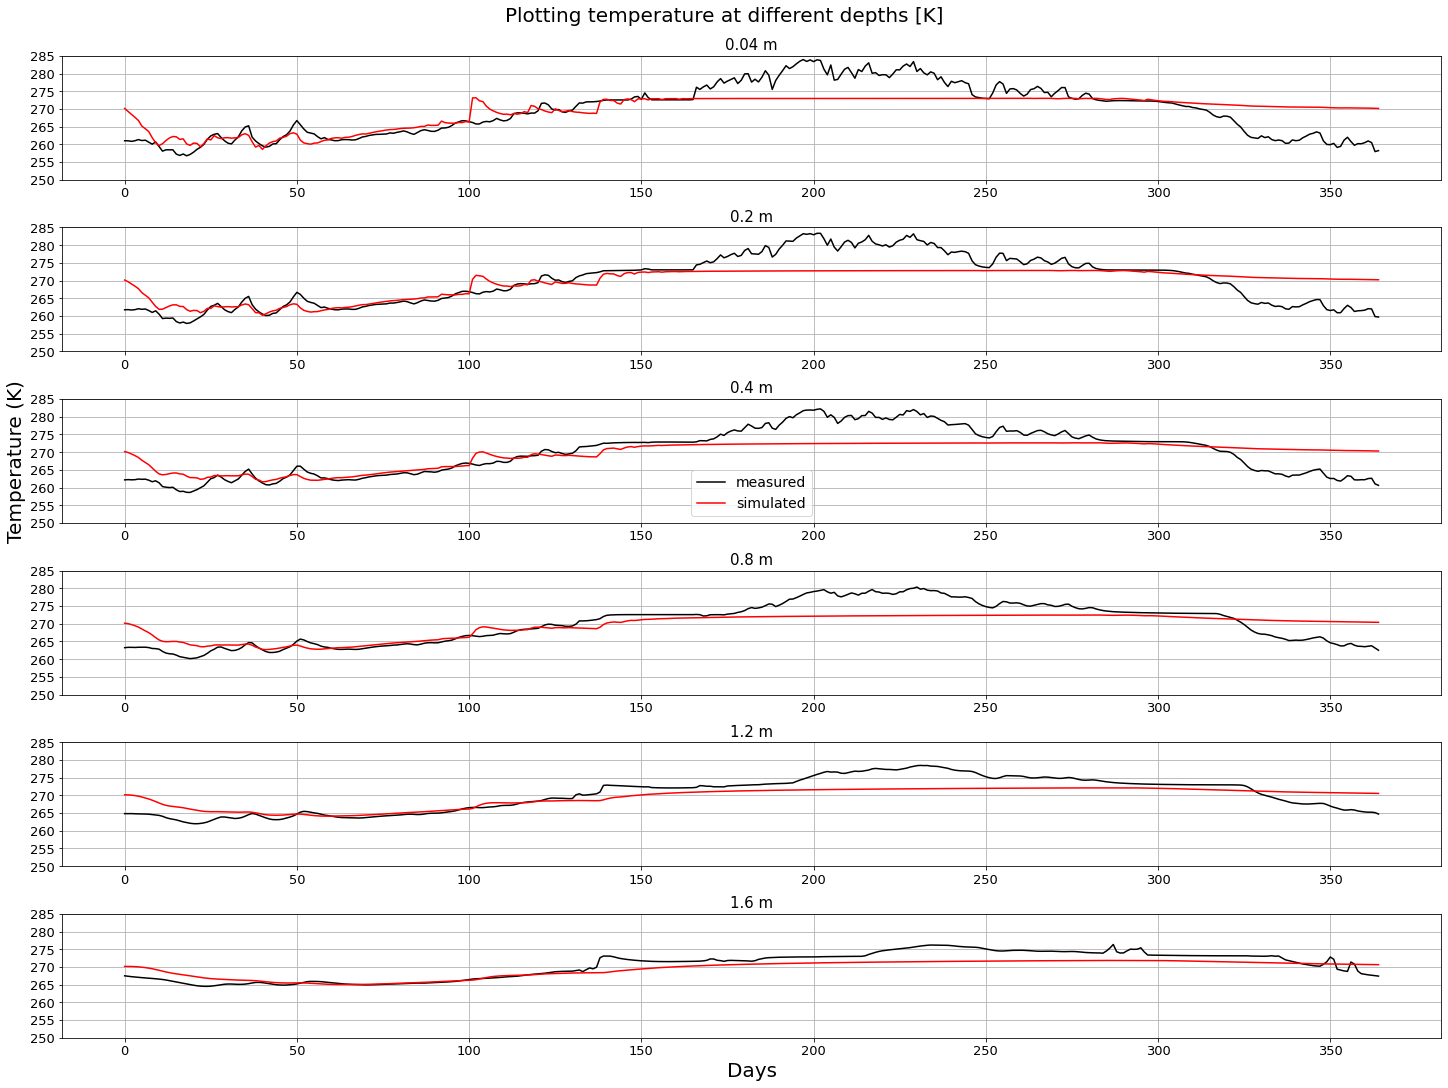

In [26]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

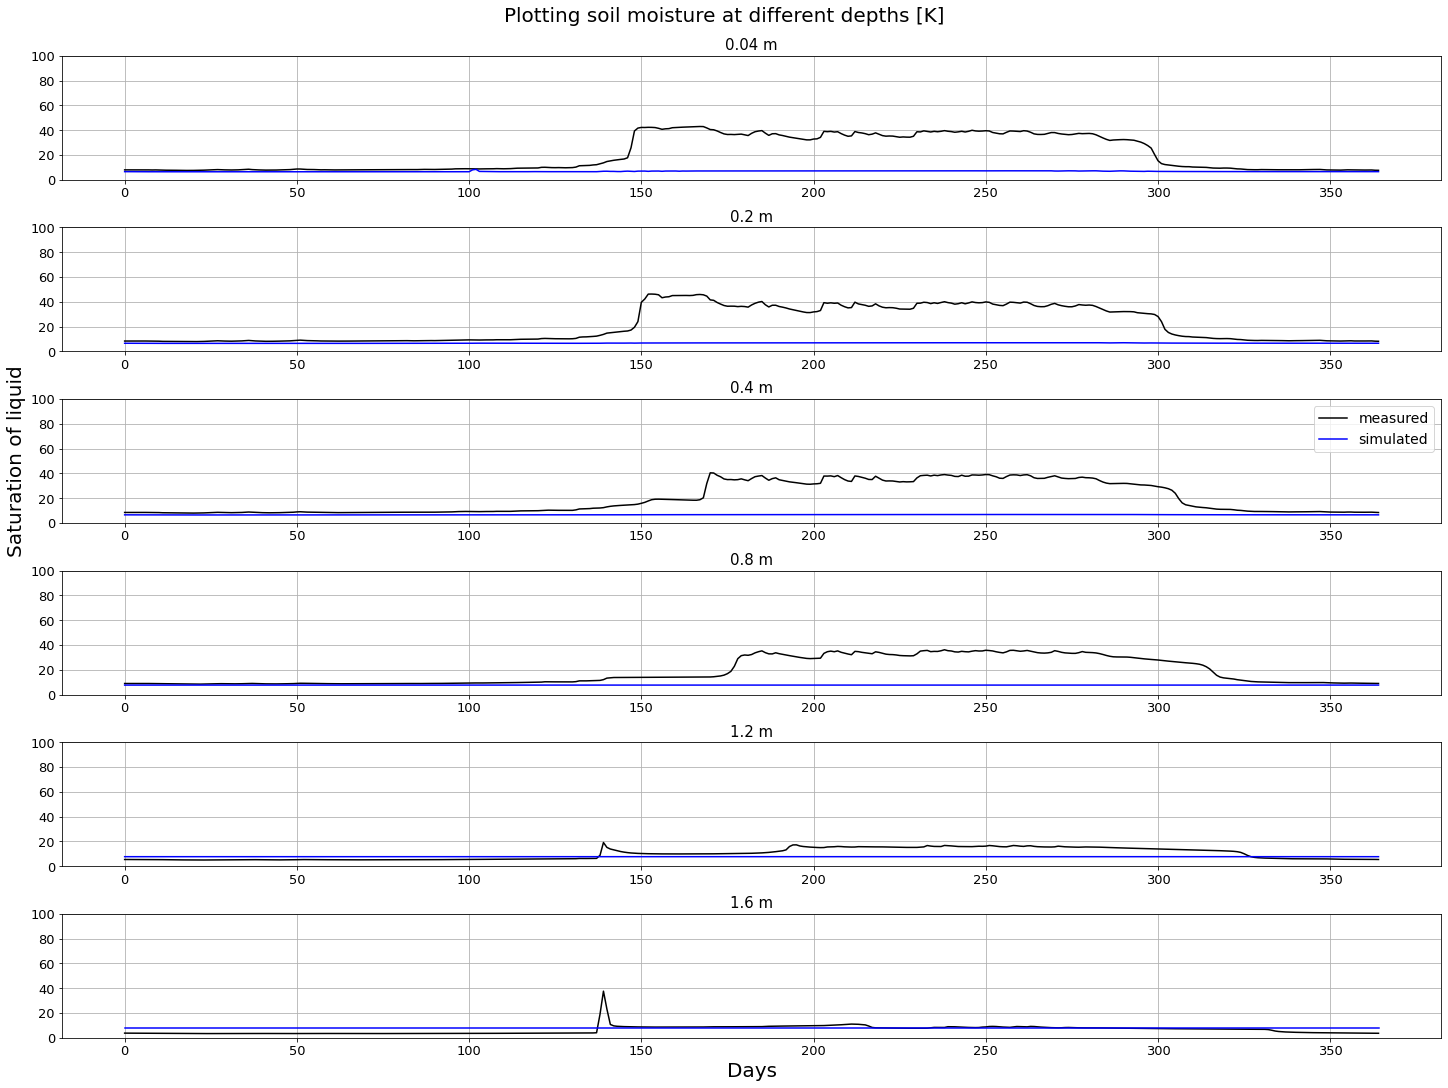

In [28]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

In [29]:
mois_measured[4519]

37.60354

<Figure size 720x432 with 0 Axes>

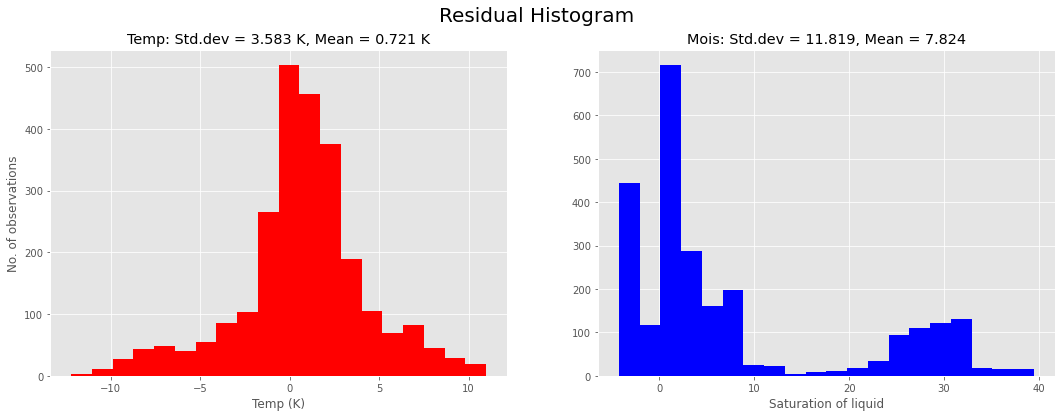

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [31]:
temp_res.describe()

count    2555.000000
mean        0.721317
std         3.582980
min       -12.203000
25%        -0.700604
50%         0.778907
75%         2.469836
max        10.976910
Name: Residual, dtype: float64

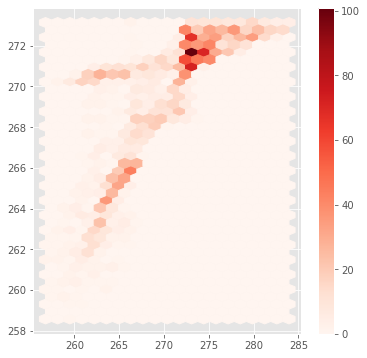

In [32]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

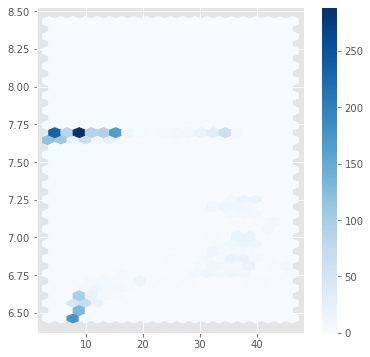

In [33]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

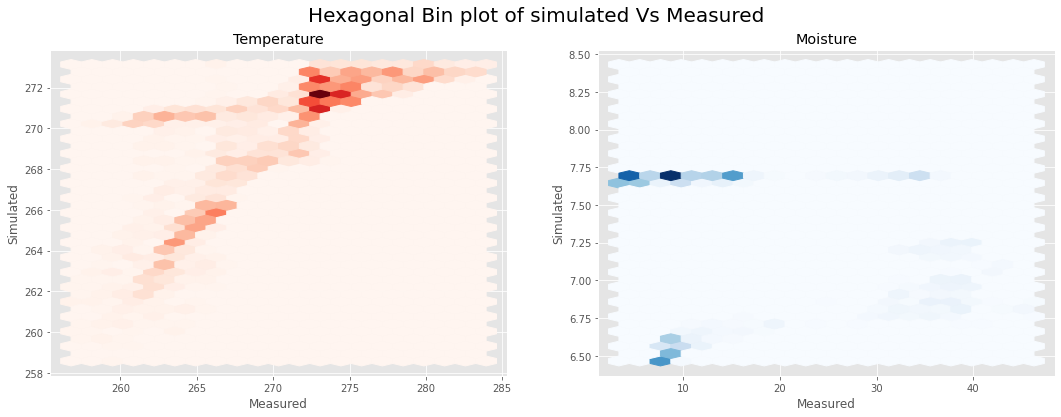

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)